In [124]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import sweetviz as sv
import warnings

In [17]:
warnings.filterwarnings('ignore')

In [2]:
twitch_df_X = pd.read_pickle('twitch_df_wrng.pkl')

In [4]:
twitch_df_X.head()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1
2,Age of Empires,1,2016,248884,232,107455,18,40,335.0,0.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,0,0,0,1,0
3,Alien: Isolation,1,2016,264294,11799,9590,42,3968,355.0,16.0,0.05,2016-01-01,2016-02-01,2016-04-01,2016-07-01,109754,122248,0,1,1
4,American Truck Simulator,1,2016,314055,724,43089,48,186,422.0,1.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2134600,141057,0,1,1


In [6]:
twitch_df_X[twitch_df_X['Hours_watched_1mth'] == 0].count()

Game                  1216
Month                 1216
Year                  1216
Hours_watched         1216
Hours_streamed        1216
Peak_viewers          1216
Peak_channels         1216
Streamers             1216
Avg_viewers           1216
Avg_channels          1216
Avg_channel_ratio     1216
Date                  1216
one_month_future      1216
three_month_future    1216
six_month_future      1216
Hours_watched_1mth    1216
Hours_watched_3mth    1216
Hours_watched_6mth    1216
Jan_Debut_Month       1216
Next_mth_200          1216
dtype: int64

In [ ]:
'''Baseline model would predict that a game will not be popular the next month after it's debut into the top 200'''

In [10]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_1mth', 'Next_mth_200']), 
                                                    twitch_df_X.Next_mth_200, test_size=0.25, stratify = twitch_df_X.Next_mth_200,
                                                    random_state=1701)

In [11]:
X_train.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Hours_watched_6mth,Jan_Debut_Month
806,524986,14432,30241,156,2696,754.0,21.0,0.03,0,0
743,153199,562,31826,11,135,220.0,1.0,0.00,0,0
1287,820649,2531,51350,64,756,1103.0,3.0,0.00,0,0
1802,419368,2271,29109,31,730,564.0,3.0,0.01,0,0
674,1208285,38368,99052,150,8207,1624.0,52.0,0.03,0,1


In [18]:
c_report = sv.compare([X_train, "Training Data"], [X_test, "Test Data"])

                                             |          | [  0%]   00:00 -> (? left)


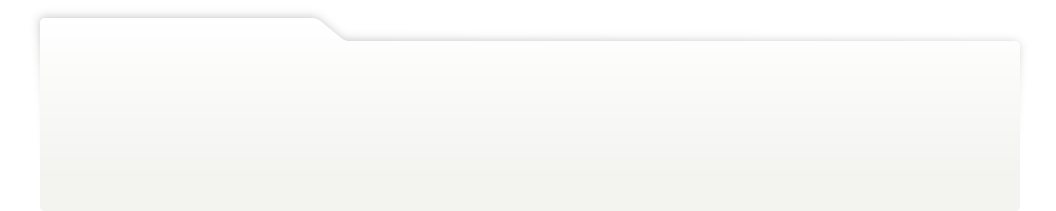
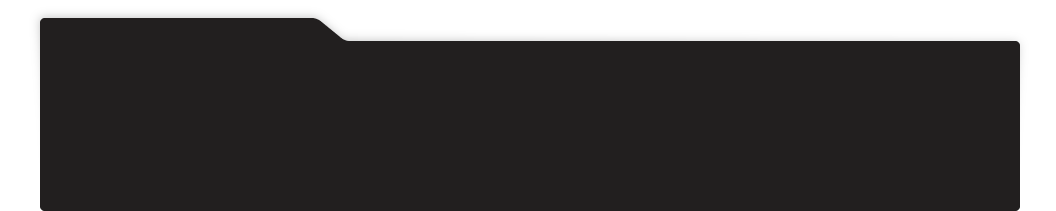
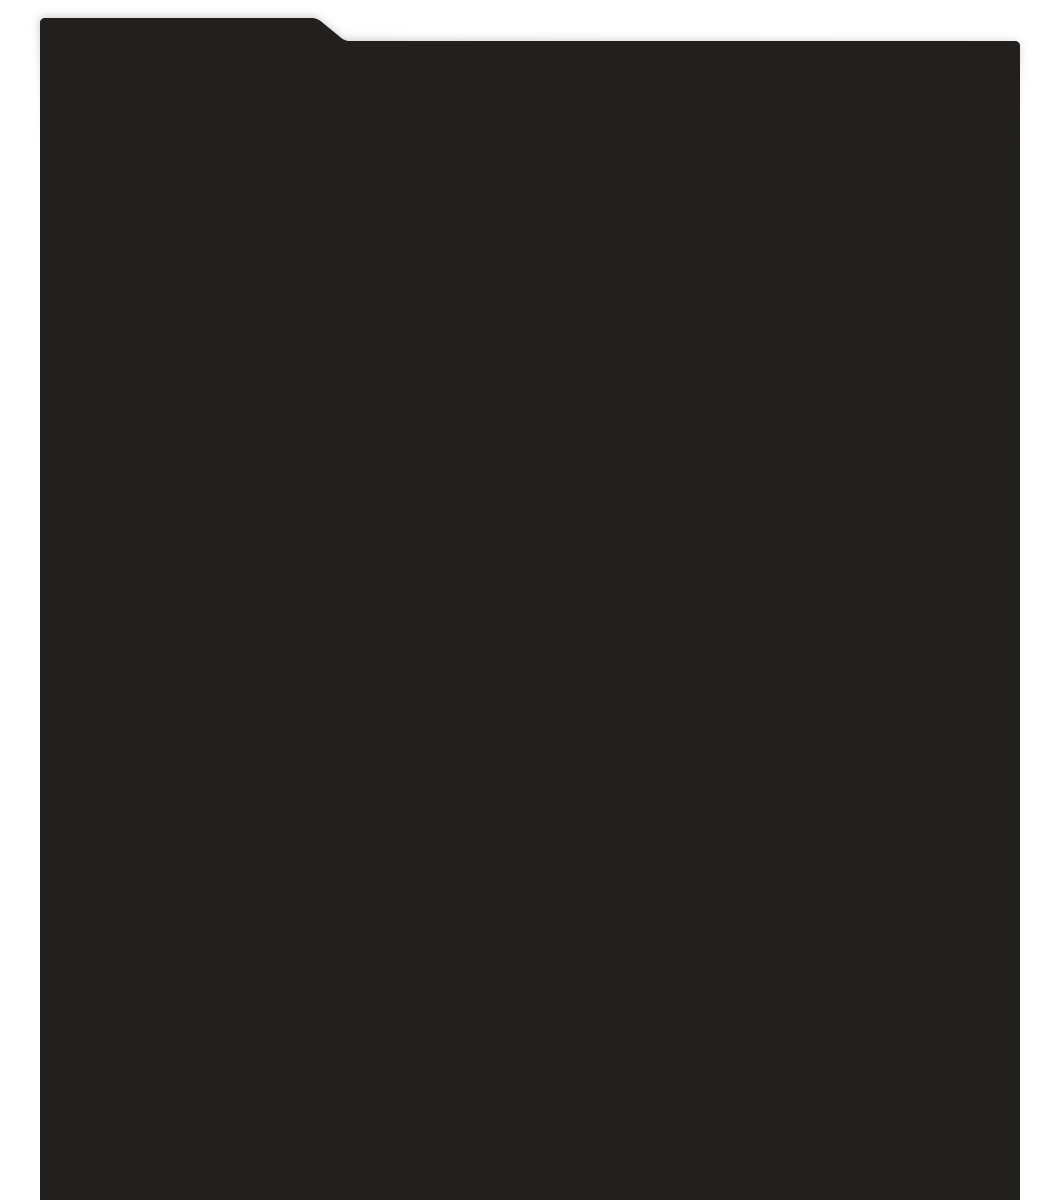
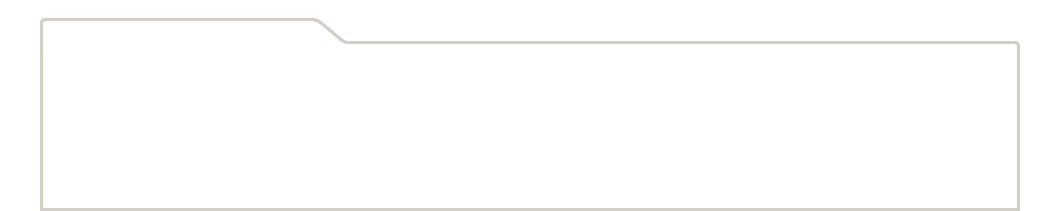
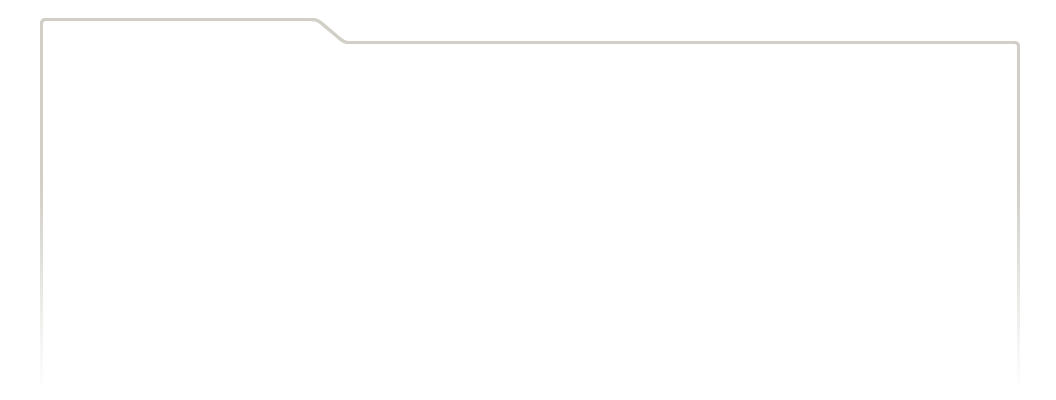
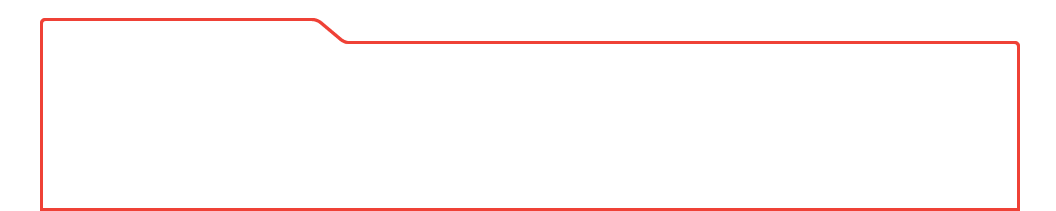
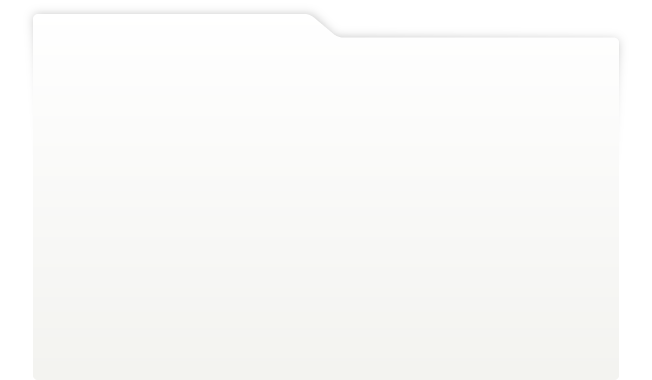
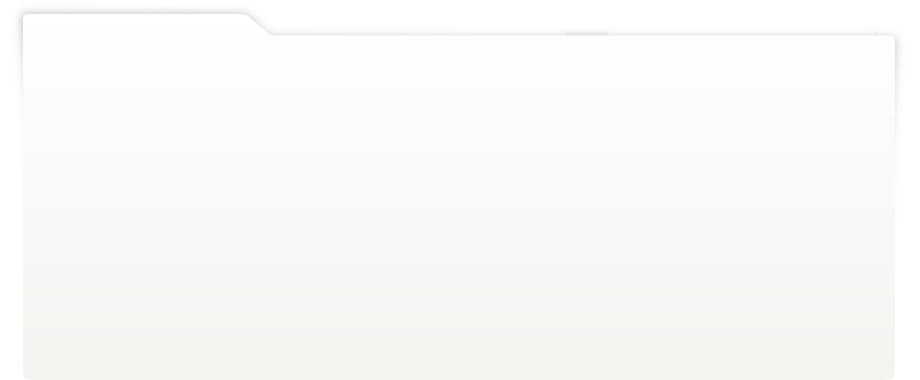
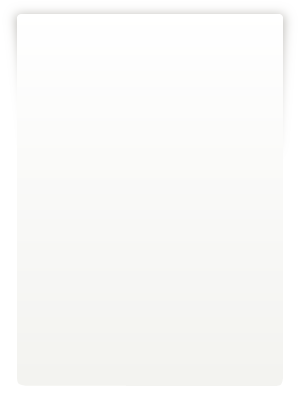
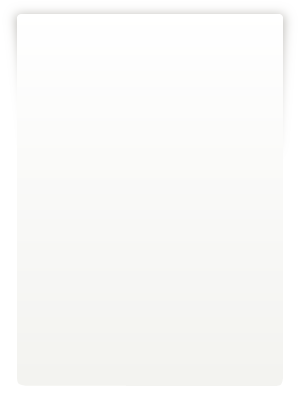
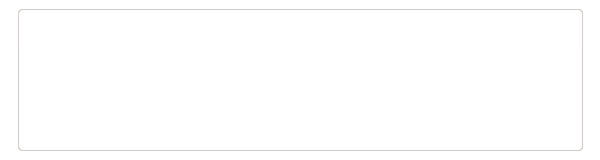
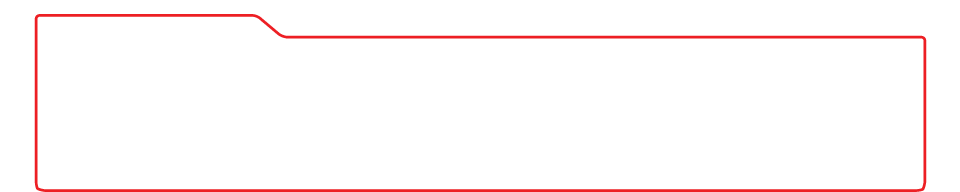
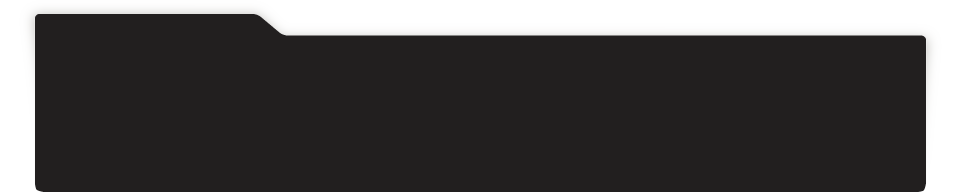
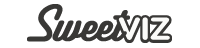
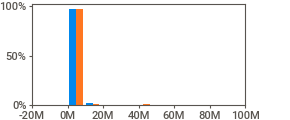
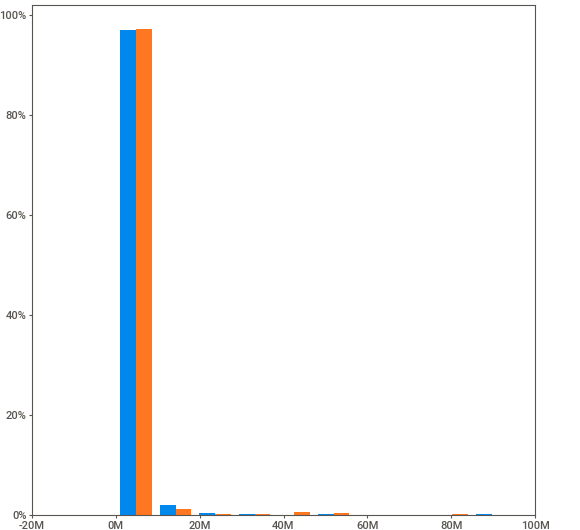
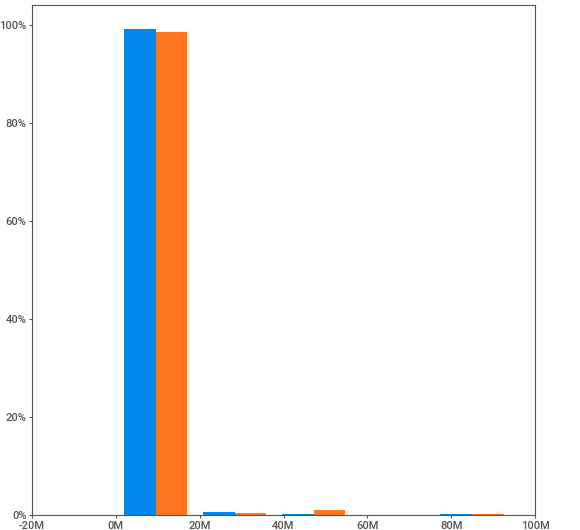
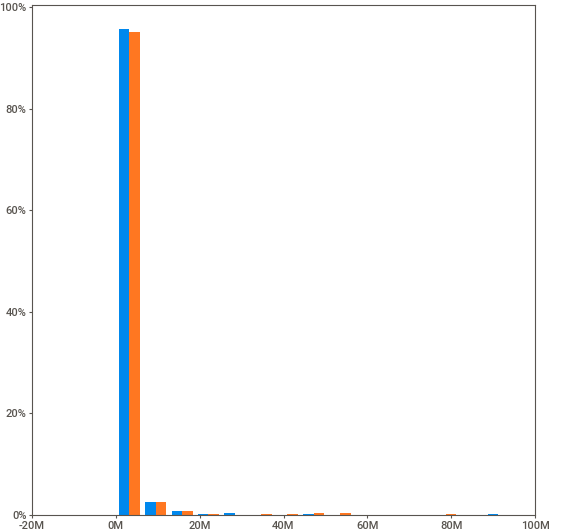
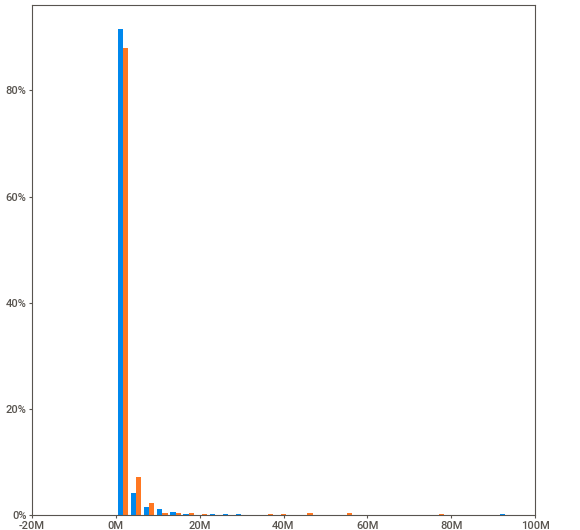
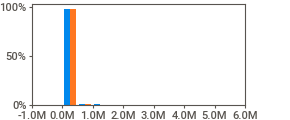
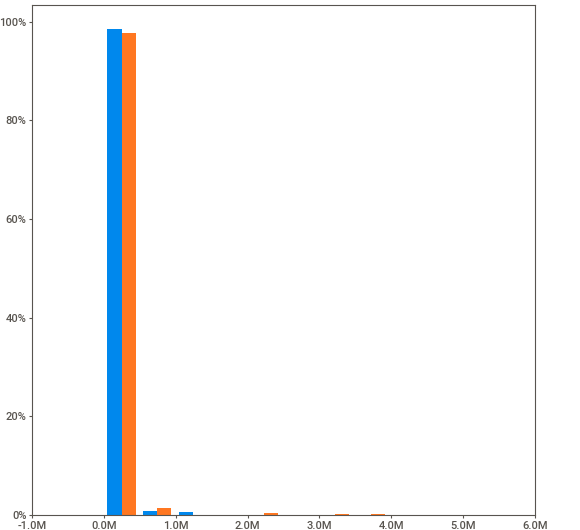
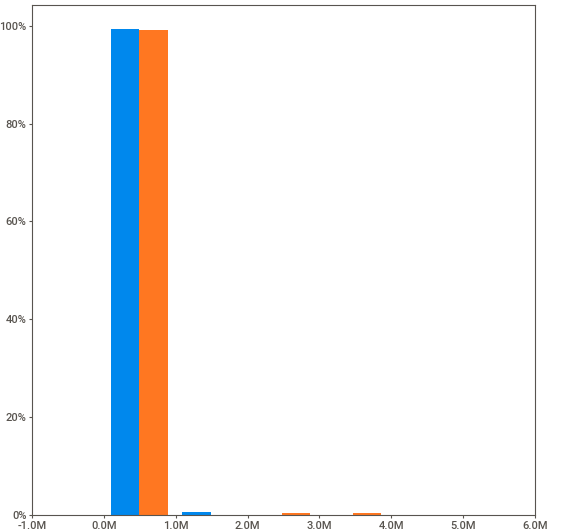
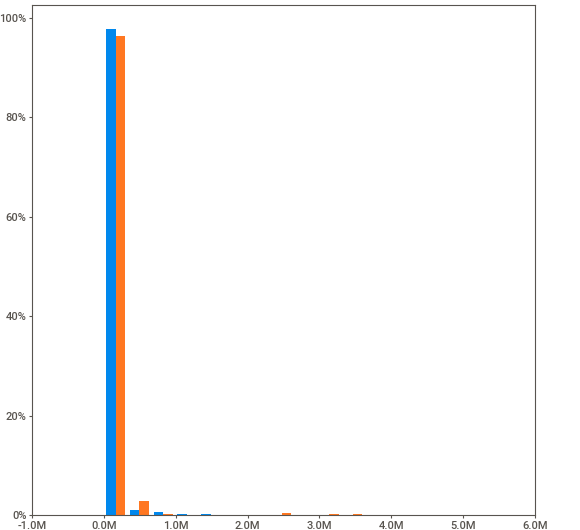
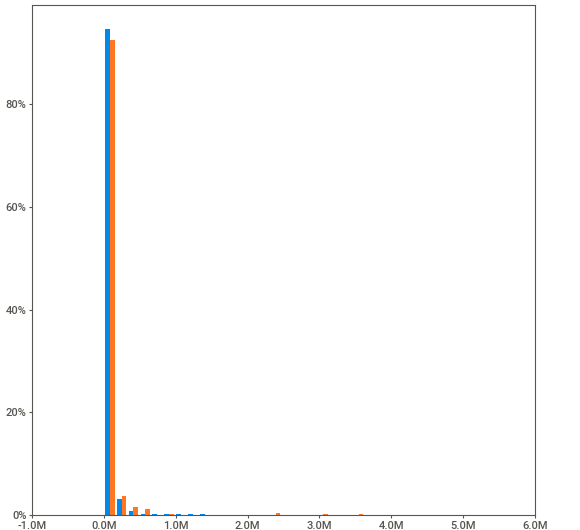
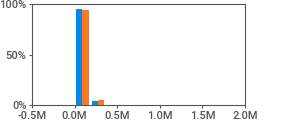
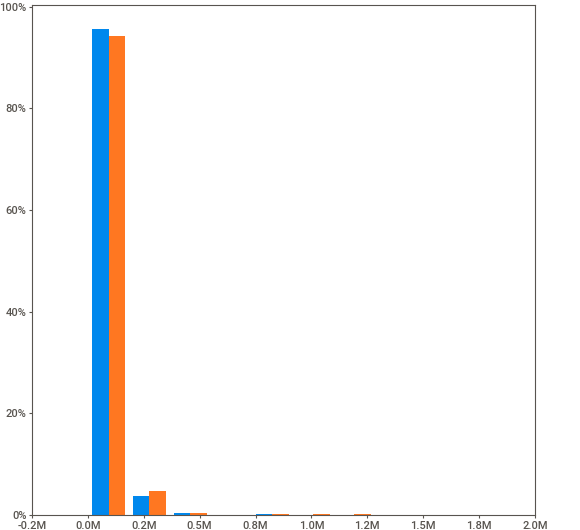
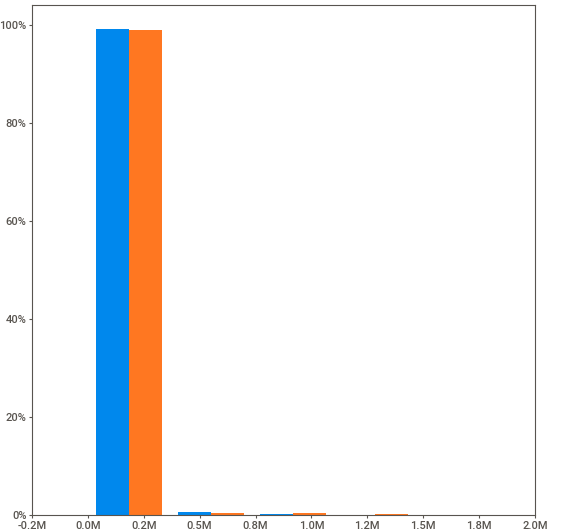
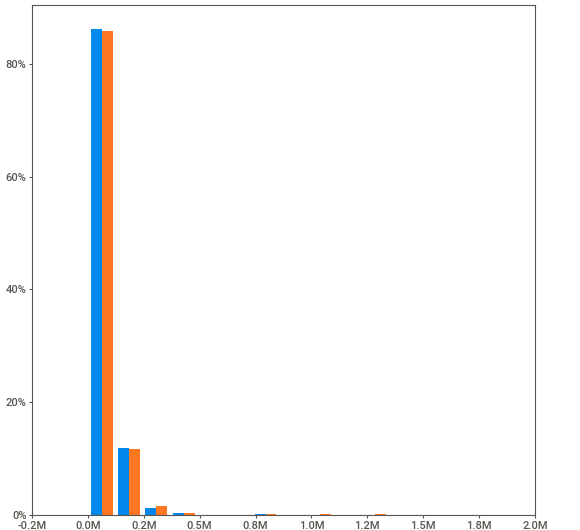
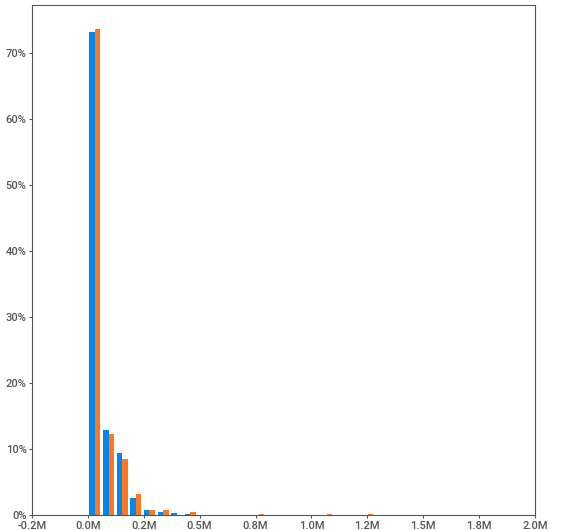
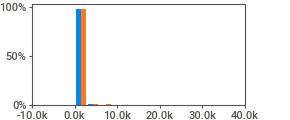
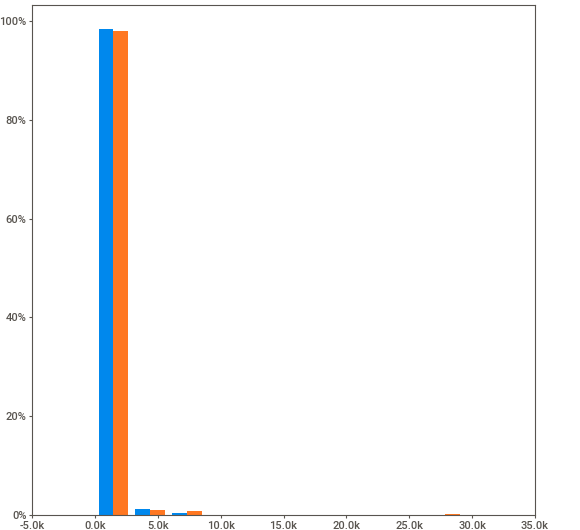
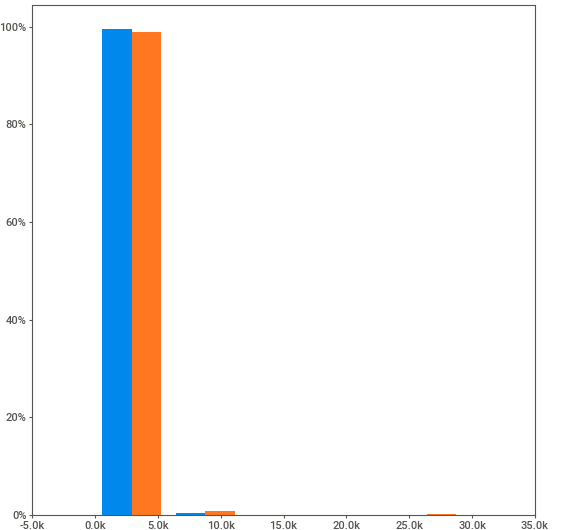
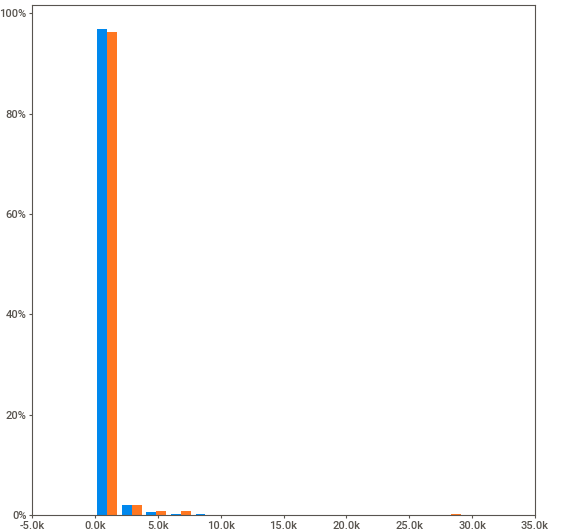
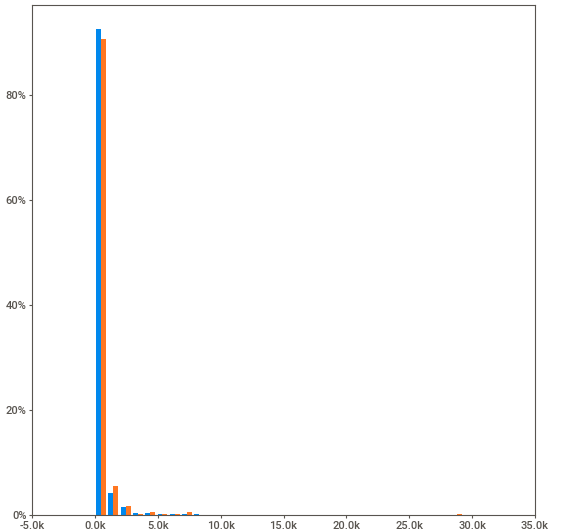
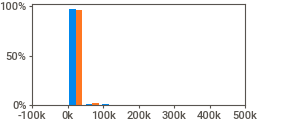
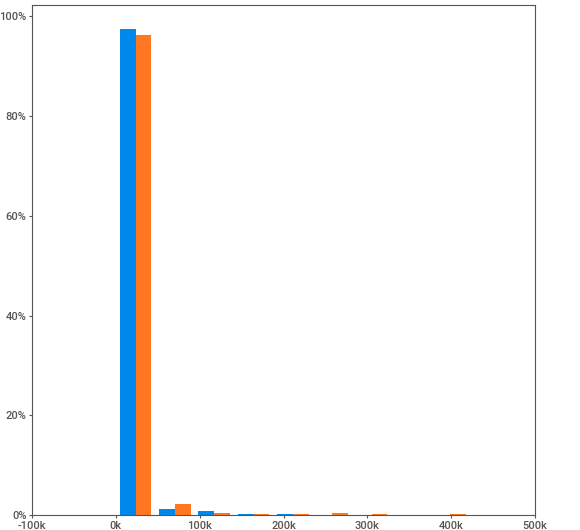
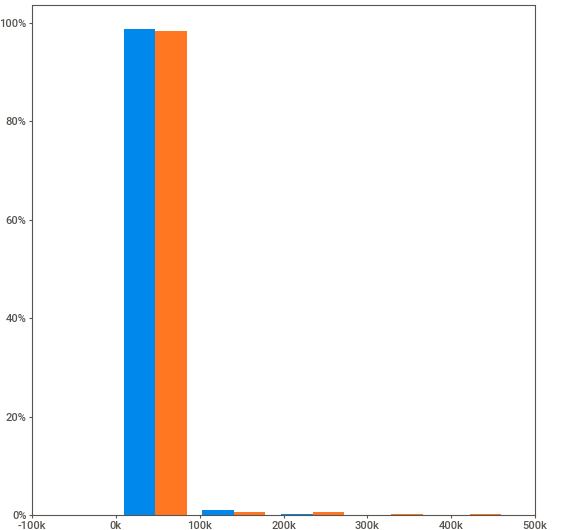
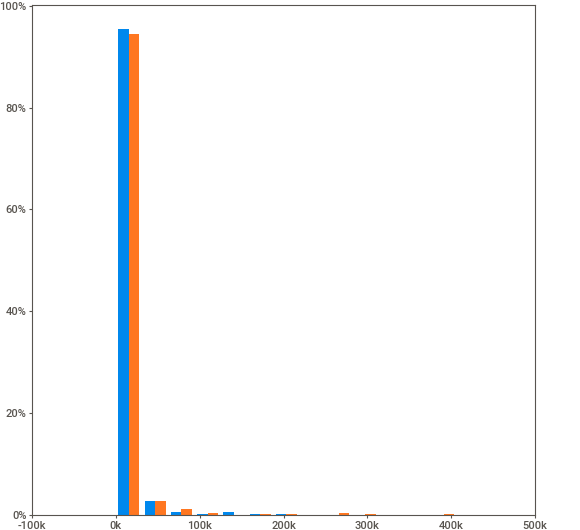
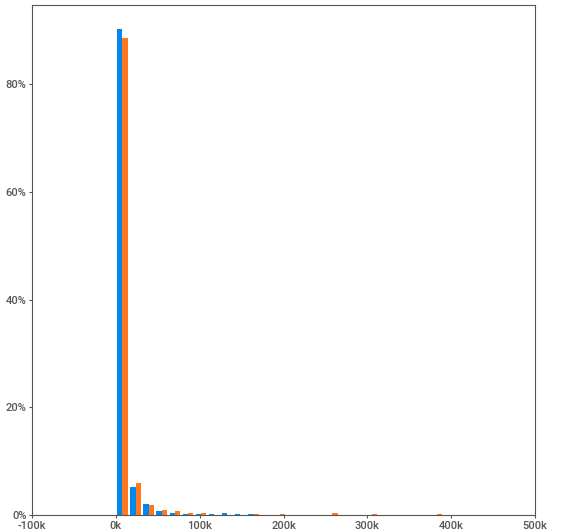
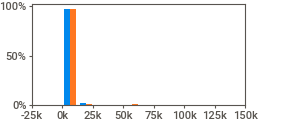
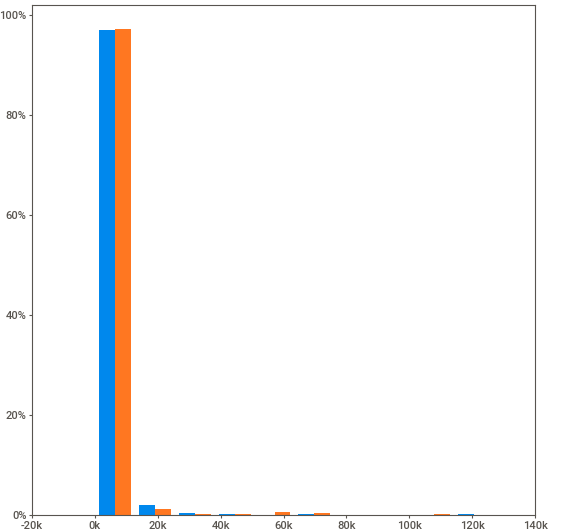
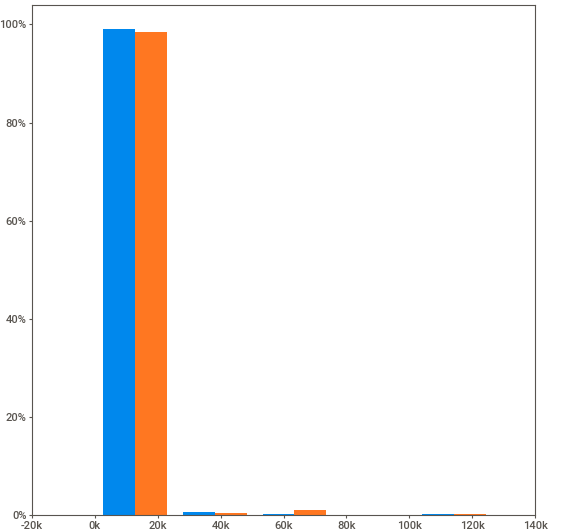
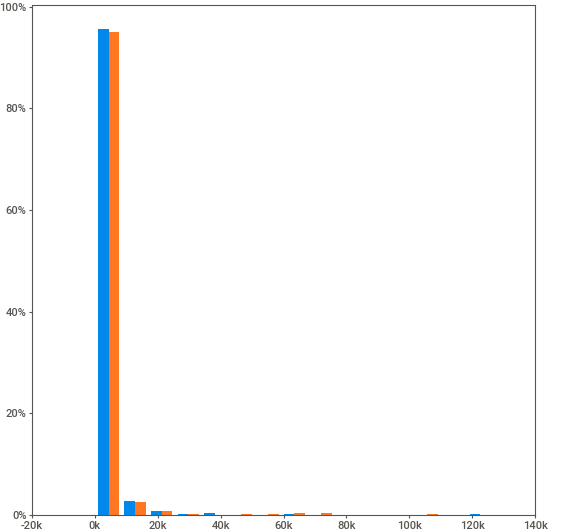
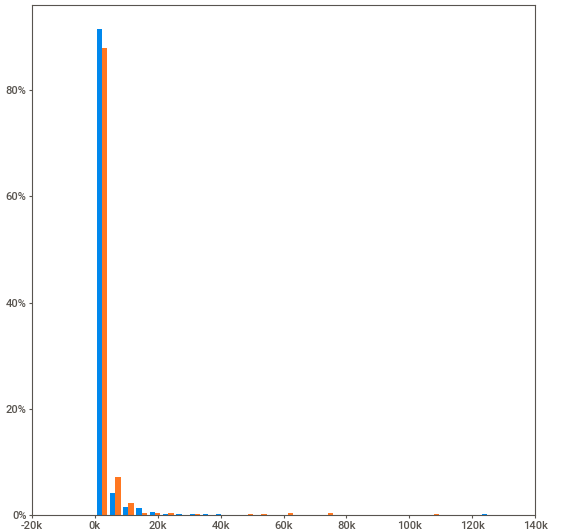
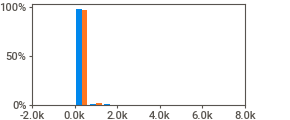
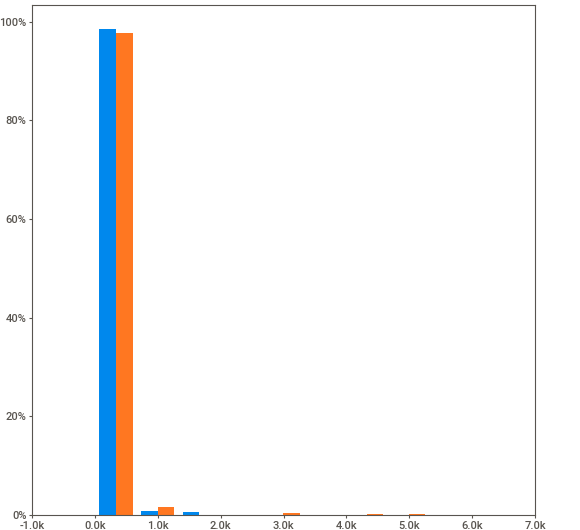
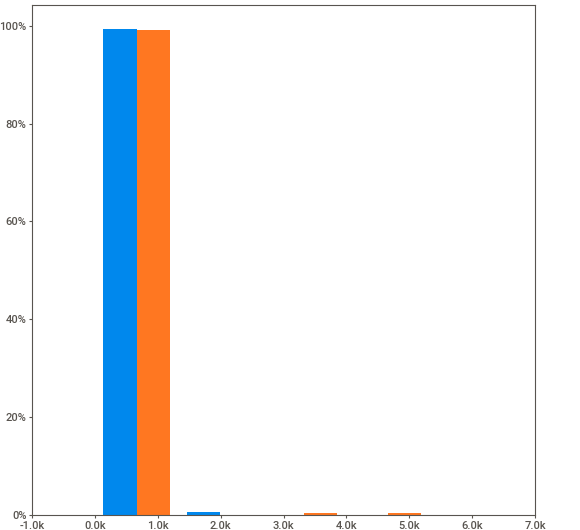
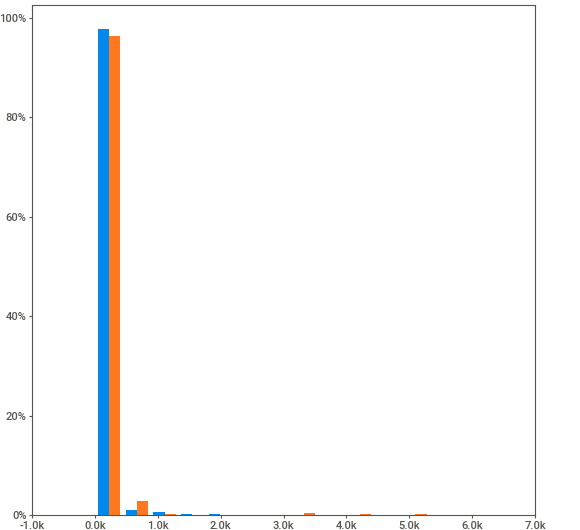
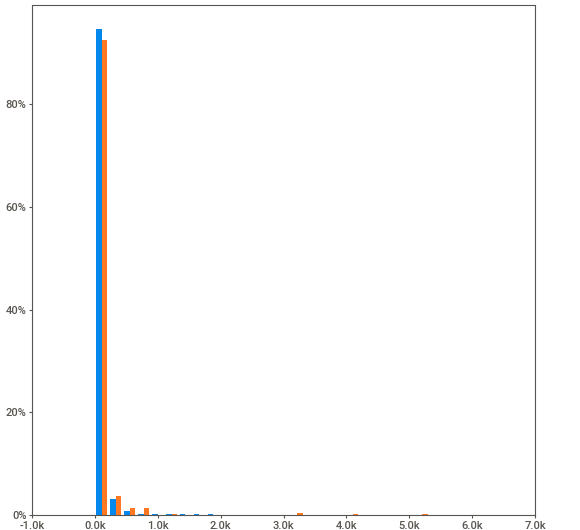
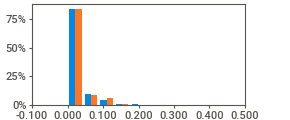
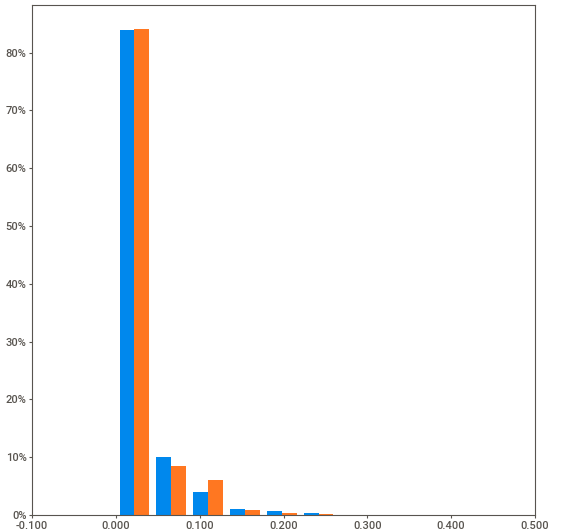
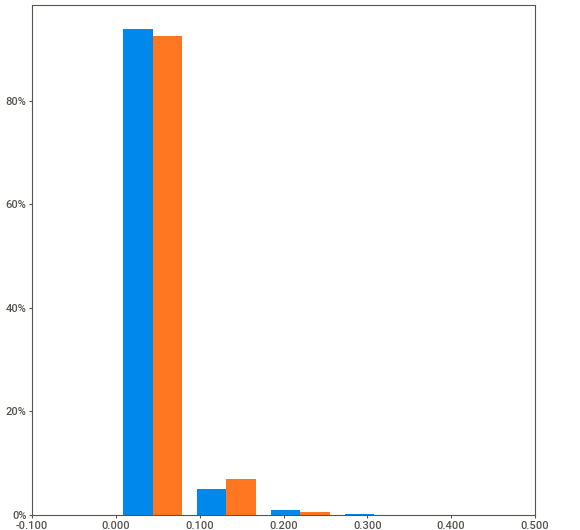
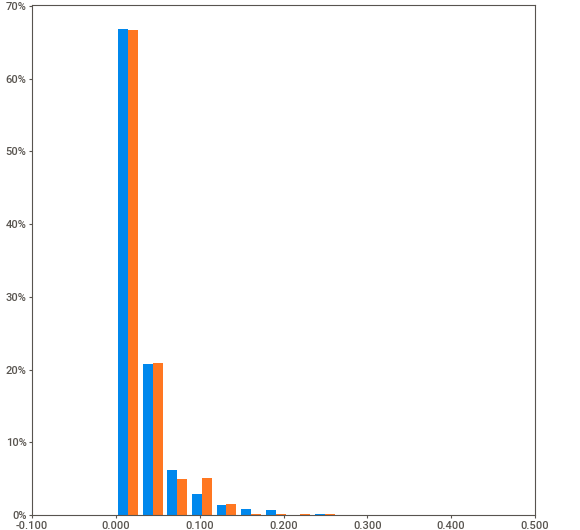
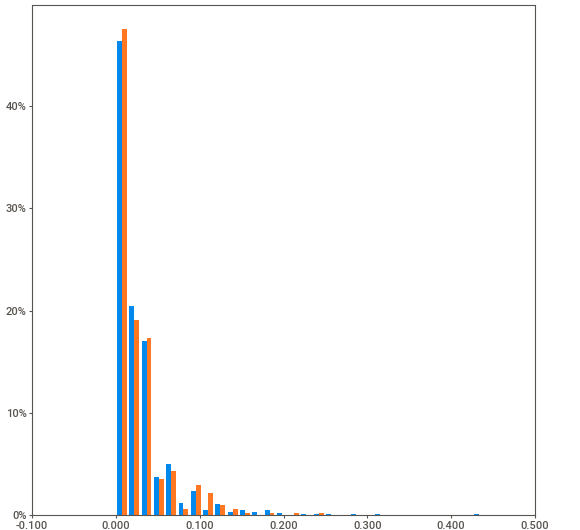
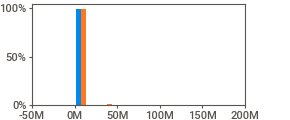
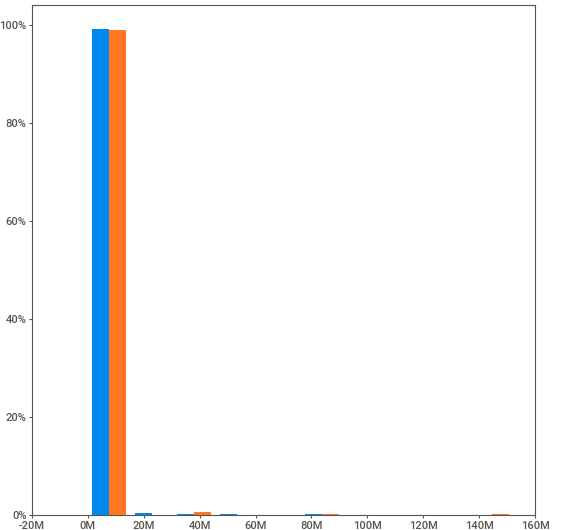
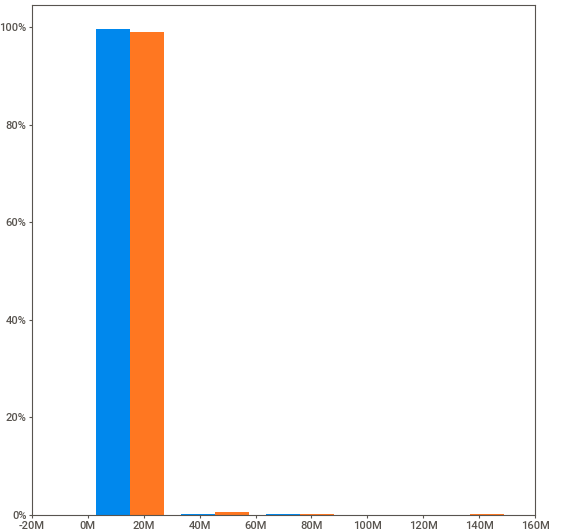
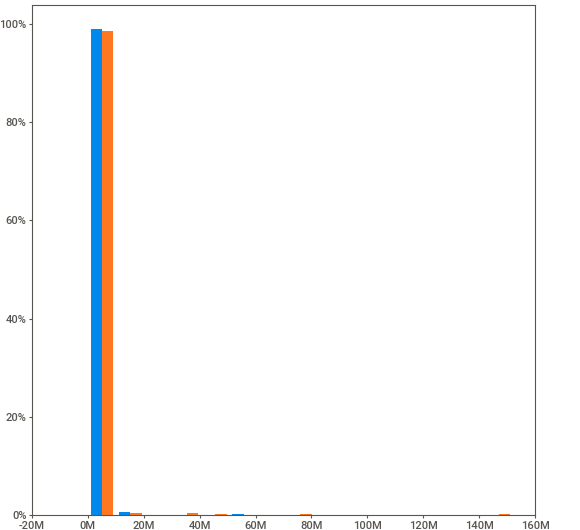
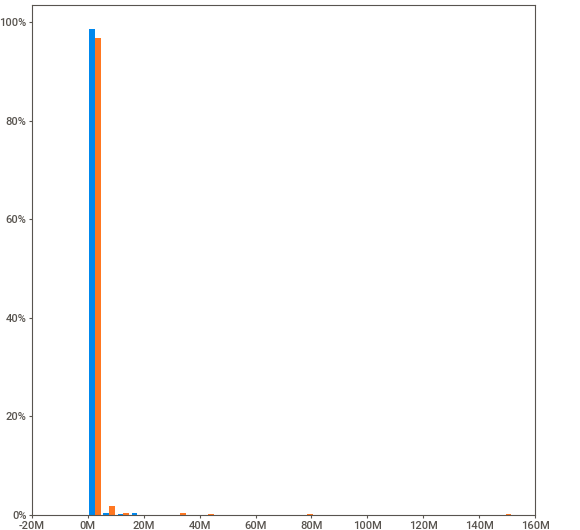
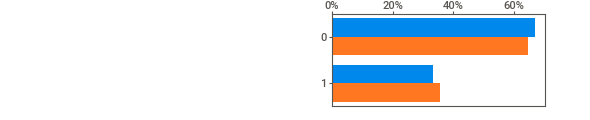
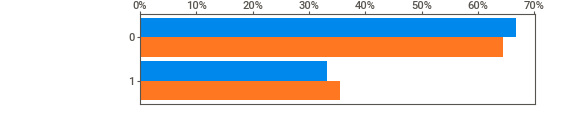
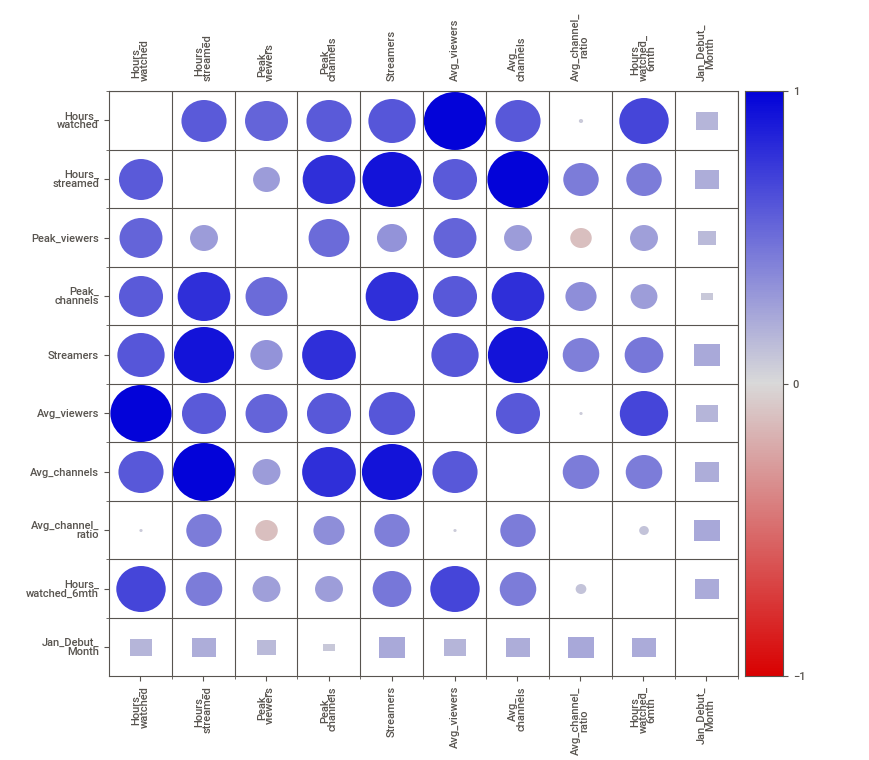
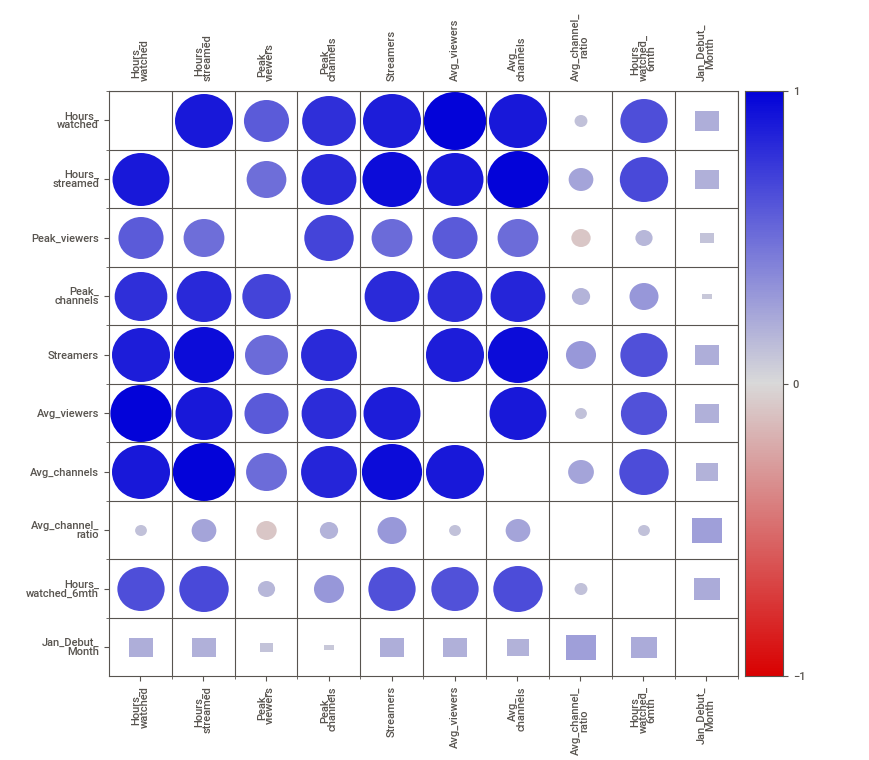

In [20]:
c_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [21]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Hours_watched_6mth,Jan_Debut_Month
0,-0.216853,-0.171149,-0.323031,-0.193528,-0.199096,-0.212386,-0.166748,0.085998,-0.123173,-0.705012
1,-0.290482,-0.240906,-0.304705,-0.362155,-0.305925,-0.290809,-0.241441,-0.747268,-0.123173,-0.705012
2,-0.158300,-0.231003,-0.078959,-0.300519,-0.280020,-0.161132,-0.233971,-0.747268,-0.123173,-0.705012
3,-0.237770,-0.232311,-0.336120,-0.338896,-0.281105,-0.240290,-0.233971,-0.469512,-0.123173,-0.705012
4,-0.081532,-0.050765,0.472593,-0.200505,0.030788,-0.084618,-0.050974,0.085998,-0.123173,1.418416


In [22]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
print("score on test: " + str(lr.score(X_test_scaled, y_test)))
print("score on train: "+ str(lr.score(X_train_scaled, y_train)))

score on test: 0.7830374753451677
score on train: 0.7437417654808959


In [25]:
baseline = 1216/2025
baseline

0.6004938271604938

In [26]:
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)

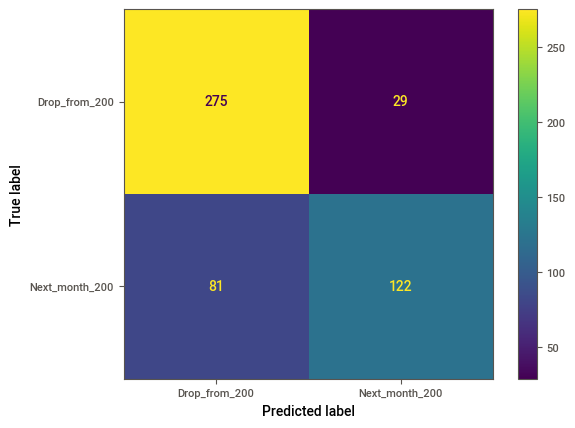

In [37]:
cm = confusion_matrix(y_test, y_pred_test_lr, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [40]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       304
           1       0.81      0.60      0.69       203

    accuracy                           0.78       507
   macro avg       0.79      0.75      0.76       507
weighted avg       0.79      0.78      0.78       507



In [48]:
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)

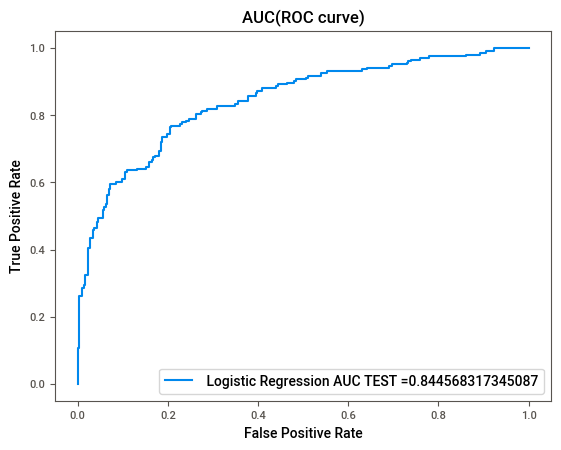

In [49]:
plt.plot(fpr_lr, tpr_lr, label=" Logistic Regression AUC TEST ="+str(auc(fpr_lr, tpr_lr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [53]:
y_pred_thresh = (lr.predict_proba(X_test_scaled)[:, 1] > .4).astype('float')

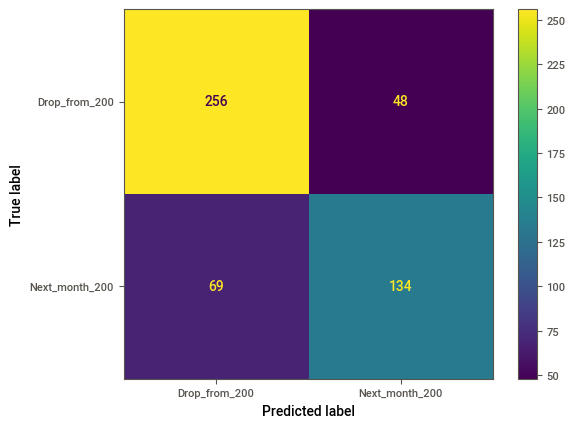

In [54]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [55]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       304
           1       0.74      0.66      0.70       203

    accuracy                           0.77       507
   macro avg       0.76      0.75      0.76       507
weighted avg       0.77      0.77      0.77       507



In [57]:
rf = RandomForestClassifier(random_state = 1701)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1701)

In [58]:
print("score on test: " + str(rf.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf.score(X_train_scaled, y_train)))

score on test: 0.7869822485207101
score on train: 1.0


In [59]:
random_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100],
 'random_state': [1701]}

In [64]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [65]:
rf_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [66]:
print("score on test: " + str(rf_random.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_random.score(X_train_scaled, y_train)))

score on test: 0.7593688362919132
score on train: 0.7595520421607378


In [67]:
rf_random.best_params_


{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [77]:
param_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [78]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [79]:
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [80]:
print("score on test: " + str(rf_grid.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_grid.score(X_train_scaled, y_train)))

score on test: 0.7593688362919132
score on train: 0.7595520421607378


In [81]:
rf_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100}

In [82]:
rf_nest_2000 = RandomForestClassifier(max_depth = 3, min_samples_leaf = 5, n_estimators = 2000)

In [83]:
rf_nest_2000.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=2000)

In [84]:
print("score on test: " + str(rf_nest_2000.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_nest_2000.score(X_train_scaled, y_train)))

score on test: 0.7593688362919132
score on train: 0.7608695652173914


In [85]:
y_pred_proba_rf = rf_grid.predict_proba(X_test_scaled)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)

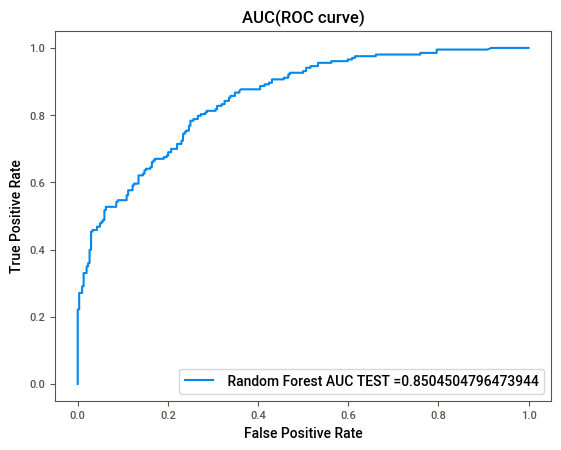

In [86]:
plt.plot(fpr_rf, tpr_rf, label=" Random Forest AUC TEST ="+str(auc(fpr_rf, tpr_rf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [89]:
y_pred_test_rf = rf_grid.predict(X_test_scaled)

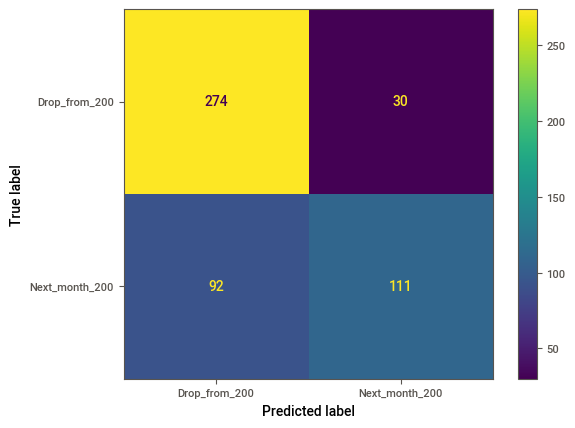

In [90]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels = rf_grid.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [107]:
y_pred_thresh = (rf_grid.predict_proba(X_test_scaled)[:, 1] > .45).astype('float')

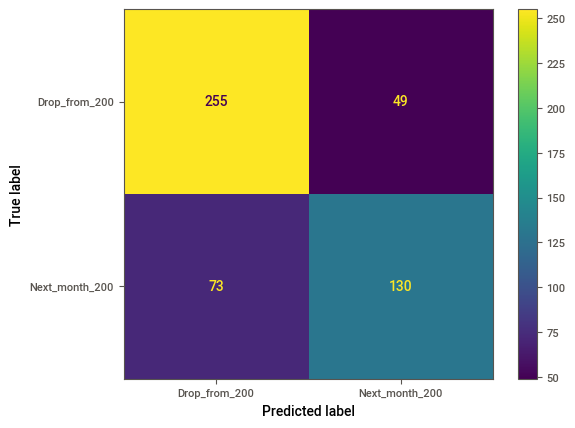

In [108]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [100]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       304
           1       0.63      0.86      0.72       203

    accuracy                           0.74       507
   macro avg       0.75      0.76      0.74       507
weighted avg       0.77      0.74      0.74       507



In [110]:
noz_df = twitch_df_X[twitch_df_X['Hours_watched_1mth'] != 0]

In [111]:
noz_df.head()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1
3,Alien: Isolation,1,2016,264294,11799,9590,42,3968,355.0,16.0,0.05,2016-01-01,2016-02-01,2016-04-01,2016-07-01,109754,122248,0,1,1
4,American Truck Simulator,1,2016,314055,724,43089,48,186,422.0,1.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2134600,141057,0,1,1
6,Arma 3,1,2016,2542838,86219,32132,275,8771,3418.0,116.0,0.03,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2912034,3130387,4422829,1,1


In [129]:
x = noz_df.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_6mth',
                                                                              'Hours_watched_1mth', 'Next_mth_200'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df.Hours_watched_1mth, test_size=0.25, random_state=1701)

In [142]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.256115,-0.319352,-0.272180,-0.330493,-0.403284,-0.256848,-0.314875,-0.696471,-1.013290
1,-0.274355,-0.294672,0.224038,-0.317483,-0.339148,-0.270921,-0.290400,-0.696471,-1.013290
2,-0.297519,-0.115383,-0.270431,0.295264,-0.201626,-0.297627,-0.116351,1.572676,-1.013290
3,-0.121909,-0.240355,0.615694,-0.237475,-0.194777,-0.124755,-0.238729,-0.696471,0.986885
4,-0.286662,-0.053396,-0.602511,-0.247882,-0.144923,-0.286944,-0.056522,1.856319,0.986885


In [143]:
mlr = LinearRegression()

In [144]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [148]:
y_pred_mlr= mlr.predict(X_test_scaled)

In [149]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1034,3650194,1.284599e+06
588,660872,1.815768e+06
177,374856,1.011052e+06
303,166134,9.005599e+05
77,222387,-3.530944e+05


In [150]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,noz_df.Hours_watched_1mth)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -302336846429960.31
Mean Absolute Error: 1739549.4728041925
Mean Square Error: 13220153993562.62
Root Mean Square Error: 3635952.969107634
